# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
# your answer here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
# your answer here
employee = pd.read_csv(r'/Users/telmabatista/Documents/Ironhack/Labs/lab-pivot-table-and-correlation/your_code/data/Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways.

In [3]:
# Method 1
# your answer here
mean = employee.groupby(["Department"]).mean()
mean

,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


In [4]:
# Method 2
# your answer here
mean = pd.pivot_table(employee, values="Salary", columns="Department", aggfunc=np.mean)
mean

Department,HR,IT,Sales
Salary,45.0,48.75,55.0


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [5]:
# your answer here
mean2 = pd.pivot_table(employee, values="Salary", index = "Title",columns="Department", aggfunc=np.mean)
mean2

Department,HR,IT,Sales
Title,,,
VP,70.0,70.0,NaN
analyst,32.5,32.5,NaN
associate,NaN,60.0,55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
# your answer here
years_work = pd.pivot_table(employee, values=["Salary","Department"], index="Title", columns="Years", aggfunc=np.mean)
years_work

Salary                              
Years          1     2     3     4     7     8
Title                                         
VP           NaN   NaN   NaN   NaN   NaN  70.0
analyst     35.0  30.0   NaN  35.0   NaN   NaN
associate    NaN  55.0  55.0   NaN  60.0   NaN

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [7]:
df = pd.pivot_table(employee, values=["Name" ,"Salary"], index="Title", 
                    columns="Department", aggfunc={"Name" : "count", "Salary" : np.mean})
df

Name            Salary            
Department   HR   IT Sales     HR    IT Sales
Title                                        
VP          1.0  1.0   NaN   70.0  70.0   NaN
analyst     2.0  2.0   NaN   32.5  32.5   NaN
associate   NaN  1.0   2.0    NaN  60.0  55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [8]:
# your answer here
df1 = pd.pivot_table(employee, values="Salary", index = "Title",
                     columns="Department", aggfunc=[np.median, min, max, np.std])
df1

median               min               max                   std  \
Department     HR    IT Sales    HR    IT Sales    HR    IT Sales        HR   
VP           70.0  70.0   NaN  70.0  70.0   NaN  70.0  70.0   NaN       NaN   
analyst      32.5  32.5   NaN  30.0  30.0   NaN  35.0  35.0   NaN  3.535534   
associate     NaN  60.0  55.0   NaN  60.0  55.0   NaN  60.0  55.0       NaN   

                            
Department        IT Sales  
VP               NaN   NaN  
analyst     3.535534   NaN  
associate        NaN   0.0

Many values are null since there are no employees with some specific combinations of title and department. 
Besides that, it's clear that salaries dont't vary much with the department, but with the job title.

#### Based on your comments, fill the missing values with an appropriate value.

I don't think values should be replaced. 
Data size is small and salaries don't vary much within the same job title thus standard deviation is sometimes due to that lack of variation in the data.

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [9]:
# your answer here
df2 = pd.pivot_table(employee, values=["Name" ,"Salary"], index="Department",
                     aggfunc={"Name" : "count", "Salary" : np.sum})
df2

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [10]:
# your answer here
df3 = pd.pivot_table(employee, values=["Years" ,"Salary"], index="Department", columns = "Title",
                     aggfunc={"Years" : np.sum, "Salary" : np.mean})
df3

Salary                   Years                  
Title          VP analyst associate    VP analyst associate
Department                                                 
HR           70.0    32.5       NaN   8.0     6.0       NaN
IT           70.0    32.5      60.0   8.0     3.0       7.0
Sales         NaN     NaN      55.0   NaN     NaN       5.0

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [11]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [12]:
# your answer here
fitbit = pd.read_csv(r'/Users/telmabatista/Documents/Ironhack/Labs/lab-pivot-table-and-correlation/your_code/data/Fitbit.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [13]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [14]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [15]:
# your answer here
fitbit["Minutes Very Active"].corr(fitbit["Steps"])

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

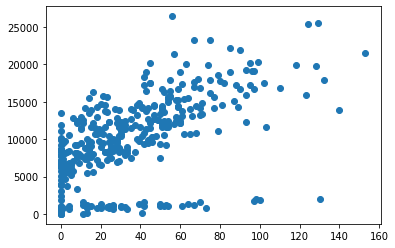

In [16]:
# your answer here
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

There is a clear positive relation between the two variables. However, it's clear that there is a significant number of cases that doesn't fit into the relation. Those could be for example some physical excercises that don't require taking steps.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [17]:
# your answer here
fitbit["Minutes Sedentary"].corr(fitbit["Steps"])

0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

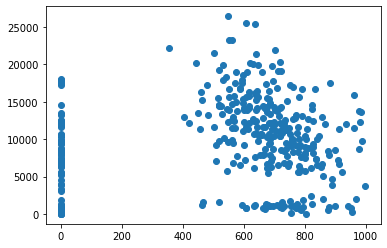

In [28]:
# your answer here
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])
plt.show()

These variables are not strongly related.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [30]:
# your answer here
fitbit["MinutesOfSleep"].corr(fitbit["Steps"])

0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

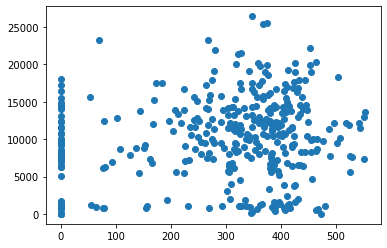

In [33]:
# your answer here
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
plt.show()

These variables are slightly correlated.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [38]:
# your answer here
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

cor_fit = fitbit.corr()[column]

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Distance,0.292790,0.779678,0.382940,0.160632,0.759310,0.129442
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Lightly Active,0.209540,0.393010,-0.085992,0.217021,-0.034425,0.105048
Minutes Fairly Active,0.188256,0.303244,0.278408,0.084137,0.337839,0.114950
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Activity Calories,-0.130758,-0.160568,-0.155532,-0.161446,-0.187309,-0.005804
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [42]:
# your answer here
cor_fit.sort_values(by=["Steps"],ascending=False)

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
Steps,0.255305,1.000000,0.779678,0.306511,0.076906,0.393010,0.303244,0.571452,-0.160568,0.130986,0.124846,0.106591,0.133405
Distance,0.292790,0.779678,1.000000,0.382940,0.160632,0.455272,0.348113,0.759310,-0.246853,0.129442,0.130447,0.091095,0.134550
Minutes Very Active,0.197881,0.571452,0.759310,0.399503,0.105963,-0.034425,0.337839,1.000000,-0.187309,0.108018,0.116559,0.099859,0.115641
Minutes Lightly Active,0.209540,0.393010,0.455272,-0.085992,0.217021,1.000000,0.014288,-0.034425,-0.219892,0.105048,0.096107,0.087150,0.105406
Floors,0.130757,0.306511,0.382940,1.000000,0.057812,-0.085992,0.278408,0.399503,-0.155532,0.069464,0.064587,0.043459,0.075864
Minutes Fairly Active,0.188256,0.303244,0.348113,0.278408,0.084137,0.014288,1.000000,0.337839,-0.204562,0.114950,0.104303,0.100498,0.123034
Calorie burned,1.000000,0.255305,0.292790,0.130757,0.125353,0.209540,0.188256,0.197881,-0.130758,0.011485,0.041999,0.030490,0.017460
LengthOfRestInMinutes,0.017460,0.133405,0.134550,0.075864,0.208539,0.105406,0.123034,0.115641,-0.004992,0.997184,0.820110,0.817326,1.000000
MinutesOfSleep,0.011485,0.130986,0.129442,0.069464,0.204242,0.105048,0.114950,0.108018,-0.005804,1.000000,0.779595,0.780512,0.997184
MinutesOfBeingAwake,0.041999,0.124846,0.130447,0.064587,0.200589,0.096107,0.104303,0.116559,0.010859,0.779595,1.000000,0.951817,0.820110


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [44]:
# your answer here
time_grades = pd.read_csv(r'/Users/telmabatista/Documents/Ironhack/Labs/lab-pivot-table-and-correlation/your_code/data/Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

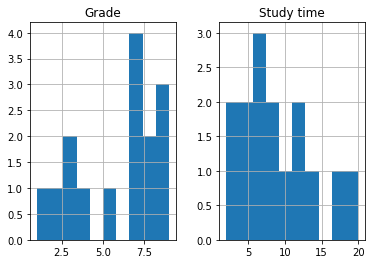

In [51]:
time_grades.hist()
plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [52]:
# Pearson
time_grades.corr()


,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [53]:
# Spearman

time_grades.corr(method="spearman")

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


The data is strongly and positively correlated - higher study time leads to higher grades. The correlation has a linear trend.

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

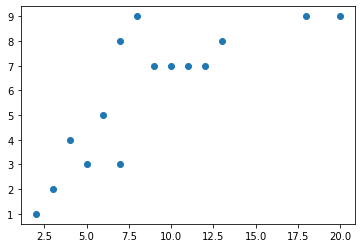

In [54]:
# your answer here
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])
plt.show()

The graphical representation supports the correlation from the last questions, indicating a positive linear trend.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

Pearson correlation measures linear correlation. In fact, Pearson correlation assumes the following for it to be accurate: 1) Each variable is normally distributed; 2) Homoscedasticity, the variance of each variable remains constant; and 3) Linearity, meaning that a scatter plot depicting the relationship shows data points clustering symmetrically around the regression line. 

On the other hand, Spearman measures the monotonic trend, using the rank of Pearson correlation instead of the actual numeric values.